# Question 3

Consider the optimization problem:

$$
f(x) = \frac{1}{2}\|Ax - b\|^2, \tag{1}
$$

where $A \in \mathbb{R}^{20 \times 50}$ and $b \in \mathbb{R}^{20}$ are from the
dataset $\texttt{HW7Q3.csv}$. The file $\texttt{HW7Q3.csv}$ contains the data $A$
and $b$. The first 50 columns form the matrix $A$ and the last column is the
vector $b$. The vector $b$ is generated by setting $b = Ax^*$ for a vector $x^*
\in \mathbb{R}^{20}$ that has 2 nonzeros. Note the linear system $Ax = b$ is
underdetermined and has a lot of solutions. Write a projected gradient method
for the following optimization problem to find the $x^*$:

$$
\text{minimize } f(x) \quad \text{s.t. } x \text{ has at most 2 nonzeros.}
$$

You can experiment with the stepsize to make sure $f(x^{(t)})$ converges to 0. You need to submit the code, the plot of $f(x^{(t)}) - f(x^*) = f(x^{(t)})$, and the indices and values of the nonzero entries of $x^*$ you found.

In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
data = np.loadtxt('HW7Q3.csv', delimiter=',')
A = data[:, :-1]
b = data[:, -1]

In [86]:
d = A.shape[1]
x = np.zeros(d)
T = 10
f_values = []

In [87]:
def f(x):
    return 1/2 * np.linalg.norm(A @ x - b)**2

def df(x):
    return A.T @ (A @ x - b)

In [88]:
s = 2
mu = 5e-2

x = np.zeros(d)
for t in range(T):
    f_values.append(f(x))
    y = x - mu * df(x)
    y_plus = np.maximum(y, 0)
    I_s = np.argpartition(y_plus, -s)[-s:]
    x = np.zeros(d)
    x[I_s] = y[I_s]

print(f_values[-1])

1.409537444226036e-07


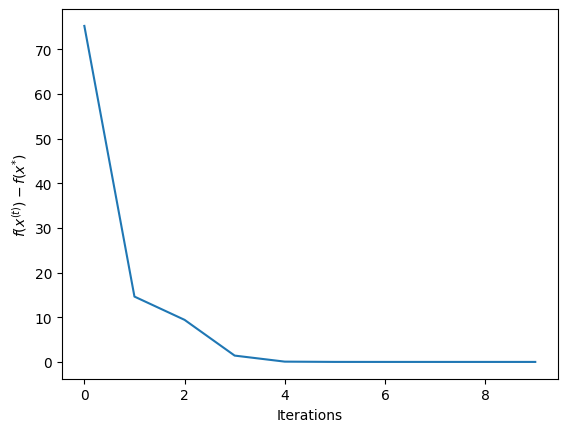

In [90]:
plt.plot(f_values)
plt.xlabel('Iterations')
plt.ylabel(r'$f(x^{(t)}) - f(x^{*})$')
plt.show()

In [92]:
nonzero_ind = np.nonzero(x)[0]
nonzero_val = x[nonzero_ind]
print("Nonzero indices:", nonzero_ind)
print("Nonzero values:", nonzero_val)


Nonzero indices: [ 0 14]
Nonzero values: [0.99997612 2.99992859]
